# Business Understanding

## Project Domain

Kanker adalah salah satu penyakit penyebab kematian tertinggi di dunia. Diagnosis dini kanker sangat krusial untuk meningkatkan tingkat kelangsungan hidup pasien. Namun, diagnosis medis membutuhkan banyak faktor klinis yang terkadang sulit diinterpretasikan secara cepat. Oleh karena itu, teknologi Machine Learning, khususnya Artificial Neural Network (ANN), dapat digunakan untuk membantu memprediksi kemungkinan seseorang mengidap kanker berdasarkan data klinis.

## Problem Statements

1. Seberapa efektif model ANN dalam melakukan klasifikasi pasien ke dalam kategori "terkena kanker" atau "tidak terkena kanker"?
2. Bagaimana membangun model kecerdasan buatan (ANN) yang mampu memprediksi apakah seorang pasien berisiko terkena kanker berdasarkan data medis sederhana?

## Goals

1. Membuat model ANN untuk memprediksi kemungkinan pasien terkena kanker.
2. Melakukan preprocessing data agar input ke model optimal.
3. Melatih dan mengevaluasi model untuk mencapai akurasi tinggi.
4. Menyimpan model dan scaler untuk prediksi masa depan.

## Solution Statements

Untuk membantu proses deteksi dini kanker secara cepat dan akurat, solusi yang ditawarkan adalah membangun model kecerdasan buatan berbasis Artificial Neural Network (ANN) yang mampu memprediksi kemungkinan seorang pasien mengidap kanker berdasarkan data klinis sederhana seperti usia, ukuran tumor, tekanan darah, kadar kolesterol, dan faktor risiko lainnya. Model ini akan dilatih menggunakan dataset terstruktur, disertai dengan proses preprocessing data, evaluasi performa, serta penyimpanan model dan proses normalisasi agar dapat digunakan kembali secara efisien.

# Data Understanding

## Import data dari kaggle

In [2]:
from google.colab import files
files.upload()
import shutil
import os
os.makedirs('/root/.kaggle', exist_ok=True)
shutil.move('kaggle.json', '/root/.kaggle/kaggle.json')
os.chmod('/root/.kaggle/kaggle.json', 600)

Saving kaggle.json to kaggle.json


In [3]:
!pip install kaggle

In [4]:
!kaggle datasets download -d rabieelkharoua/cancer-prediction-dataset

Dataset URL: https://www.kaggle.com/datasets/rabieelkharoua/cancer-prediction-dataset
License(s): Attribution 4.0 International (CC BY 4.0)


In [5]:
!unzip cancer-prediction-dataset.zip -d dataset

Archive:  cancer-prediction-dataset.zip
  inflating: dataset/The_Cancer_data_1500_V2.csv  


## Import Library yang dibutuhkan

In [6]:
# Data manipulation
import numpy as np
import pandas as pd
import tensorflow as tf

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Modeling (Keras)
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization
from keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.random import set_seed


# Evaluation
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

In [7]:
data = pd.read_csv('dataset/The_Cancer_data_1500_V2.csv')

In [8]:
data.head()

,Age,Gender,BMI,Smoking,GeneticRisk,PhysicalActivity,AlcoholIntake,CancerHistory,Diagnosis
0,58,1,16.085313,0,1,8.146251,4.148219,1,1
1,71,0,30.828784,0,1,9.361630,3.519683,0,0
2,48,1,38.785084,0,2,5.135179,4.728368,0,1
3,34,0,30.040296,0,0,9.502792,2.044636,0,0
4,62,1,35.479721,0,0,5.356890,3.309849,0,1


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               1500 non-null   int64  
 1   Gender            1500 non-null   int64  
 2   BMI               1500 non-null   float64
 3   Smoking           1500 non-null   int64  
 4   GeneticRisk       1500 non-null   int64  
 5   PhysicalActivity  1500 non-null   float64
 6   AlcoholIntake     1500 non-null   float64
 7   CancerHistory     1500 non-null   int64  
 8   Diagnosis         1500 non-null   int64  
dtypes: float64(3), int64(6)
memory usage: 105.6 KB


In [10]:
data.describe()

,Age,Gender,BMI,Smoking,GeneticRisk,PhysicalActivity,AlcoholIntake,CancerHistory,Diagnosis
count,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000
mean,50.320000,0.490667,27.513321,0.269333,0.508667,4.897929,2.417987,0.144000,0.371333
std,17.640968,0.500080,7.230012,0.443761,0.678895,2.866162,1.419318,0.351207,0.483322
min,20.000000,0.000000,15.000291,0.000000,0.000000,0.002410,0.001215,0.000000,0.000000
25%,35.000000,0.000000,21.483134,0.000000,0.000000,2.434609,1.210598,0.000000,0.000000
50%,51.000000,0.000000,27.598494,0.000000,0.000000,4.834316,2.382971,0.000000,0.000000
75%,66.000000,1.000000,33.850837,1.000000,1.000000,7.409896,3.585624,0.000000,1.000000
max,80.000000,1.000000,39.958688,1.000000,2.000000,9.994607,4.987115,1.000000,1.000000


## Exploratory Data Analysis

In [11]:
# 1. Melihat informasi umum
print("Jumlah baris dan kolom:", data.shape)
print("\nInfo dataset:")
print(data.info())
print("\nStatistik deskriptif:")
print(data.describe())

Jumlah baris dan kolom: (1500, 9)

Info dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               1500 non-null   int64  
 1   Gender            1500 non-null   int64  
 2   BMI               1500 non-null   float64
 3   Smoking           1500 non-null   int64  
 4   GeneticRisk       1500 non-null   int64  
 5   PhysicalActivity  1500 non-null   float64
 6   AlcoholIntake     1500 non-null   float64
 7   CancerHistory     1500 non-null   int64  
 8   Diagnosis         1500 non-null   int64  
dtypes: float64(3), int64(6)
memory usage: 105.6 KB
None

Statistik deskriptif:
               Age       Gender          BMI      Smoking  GeneticRisk  \
count  1500.000000  1500.000000  1500.000000  1500.000000  1500.000000   
mean     50.320000     0.490667    27.513321     0.269333     0.508667   
std      17.640968     0.5

In [12]:
# 2. Cek Missing Values
print("\nJumlah Missing Values per kolom:")
print(data.isnull().sum())


Jumlah Missing Values per kolom:
Age                 0
Gender              0
BMI                 0
Smoking             0
GeneticRisk         0
PhysicalActivity    0
AlcoholIntake       0
CancerHistory       0
Diagnosis           0
dtype: int64


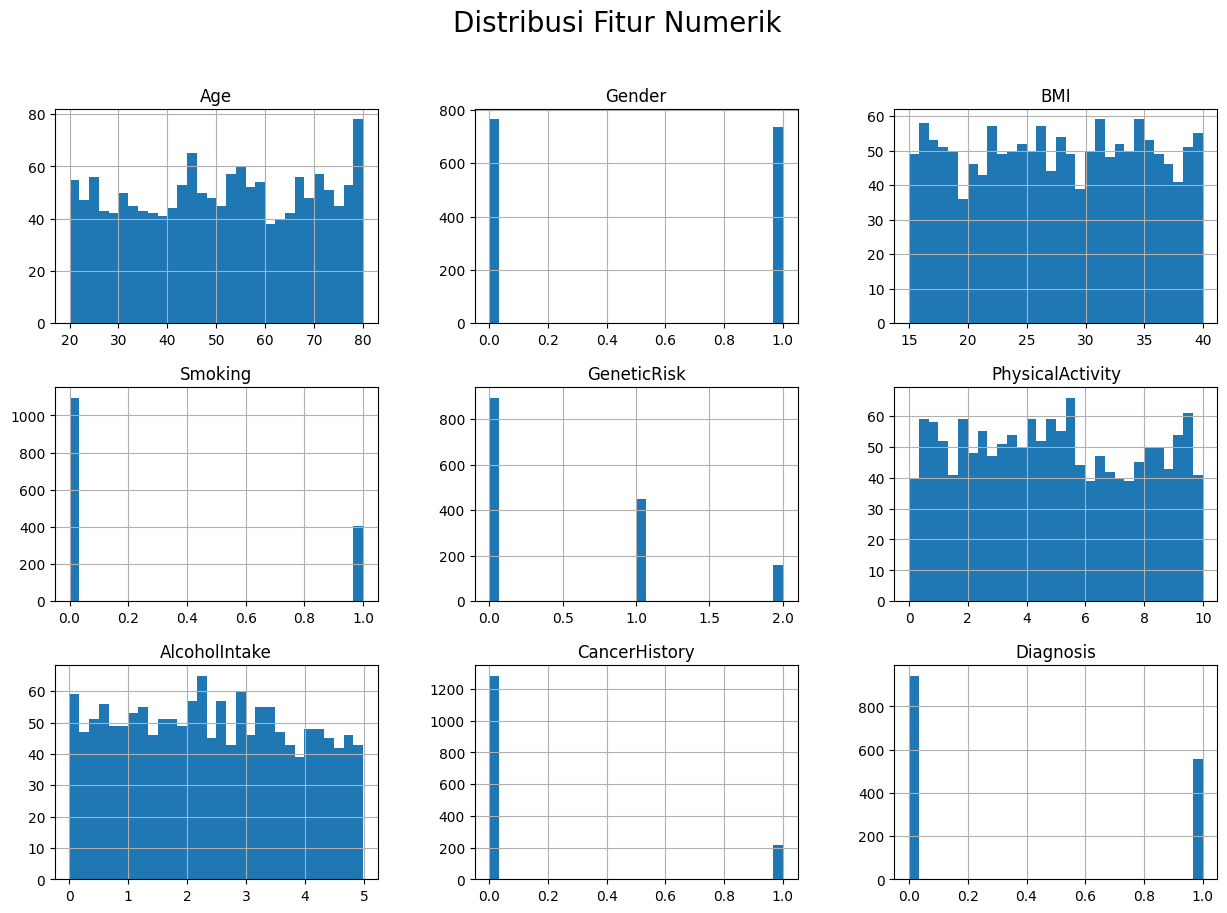

In [13]:
# 3. Distribusi fitur numerik
num_cols = data.select_dtypes(include=['int64', 'float64']).columns
data[num_cols].hist(figsize=(15, 10), bins=30)
plt.suptitle('Distribusi Fitur Numerik', fontsize=20)
plt.show()

In [14]:
# 4. Distribusi fitur kategorikal
cat_cols = data.select_dtypes(include=['object']).columns
for col in cat_cols:
    plt.figure(figsize=(8,4))
    sns.countplot(x=col, data=data)
    plt.title(f'Distribusi {col}')
    plt.xticks(rotation=45)
    plt.show()

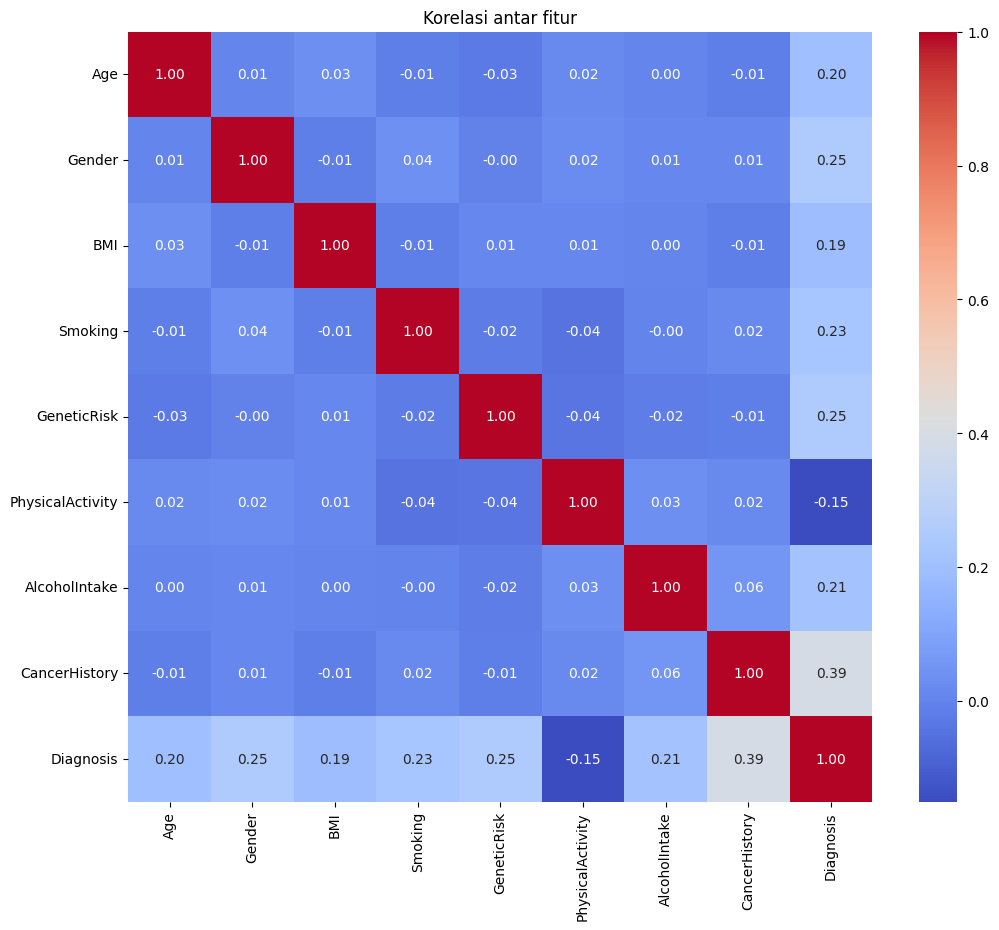

In [15]:
# 5. Korelasi antar fitur
plt.figure(figsize=(12,10))
corr = data.corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Korelasi antar fitur')
plt.show()

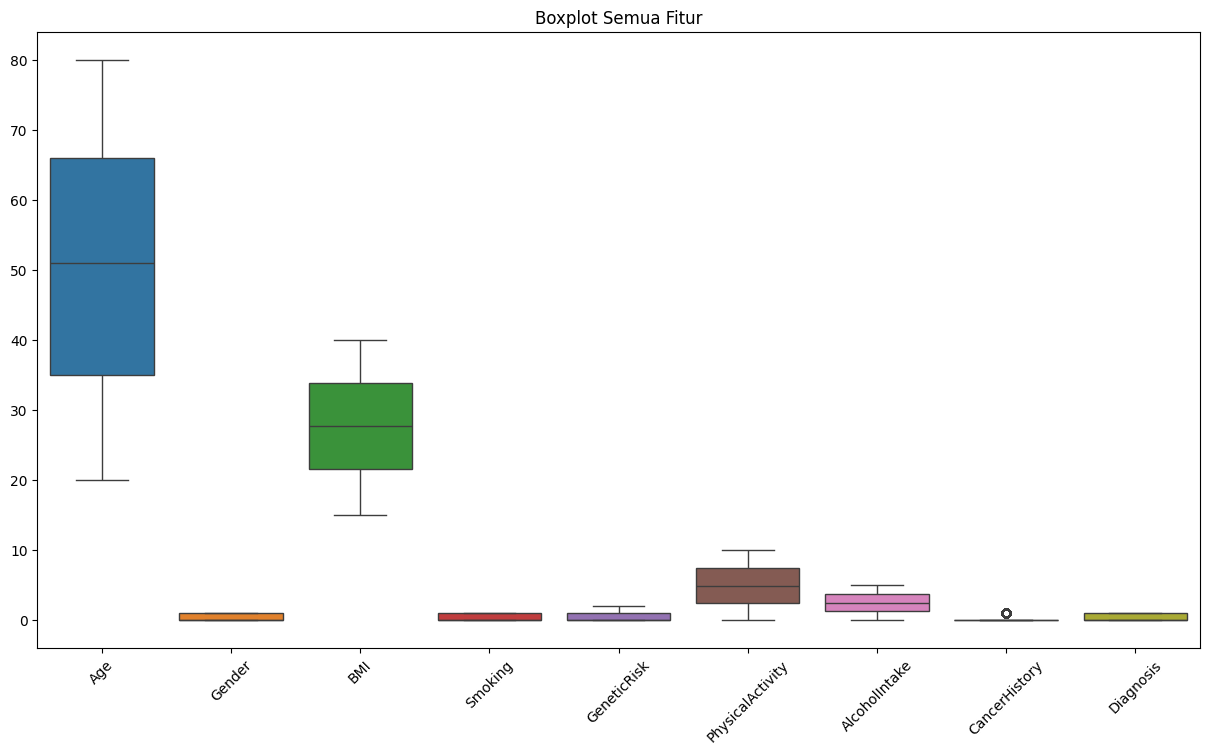

In [16]:
# Plot boxplot untuk semua fitur numerik
plt.figure(figsize=(15, 8))
sns.boxplot(data=data)
plt.title('Boxplot Semua Fitur')
plt.xticks(rotation=45)
plt.show()

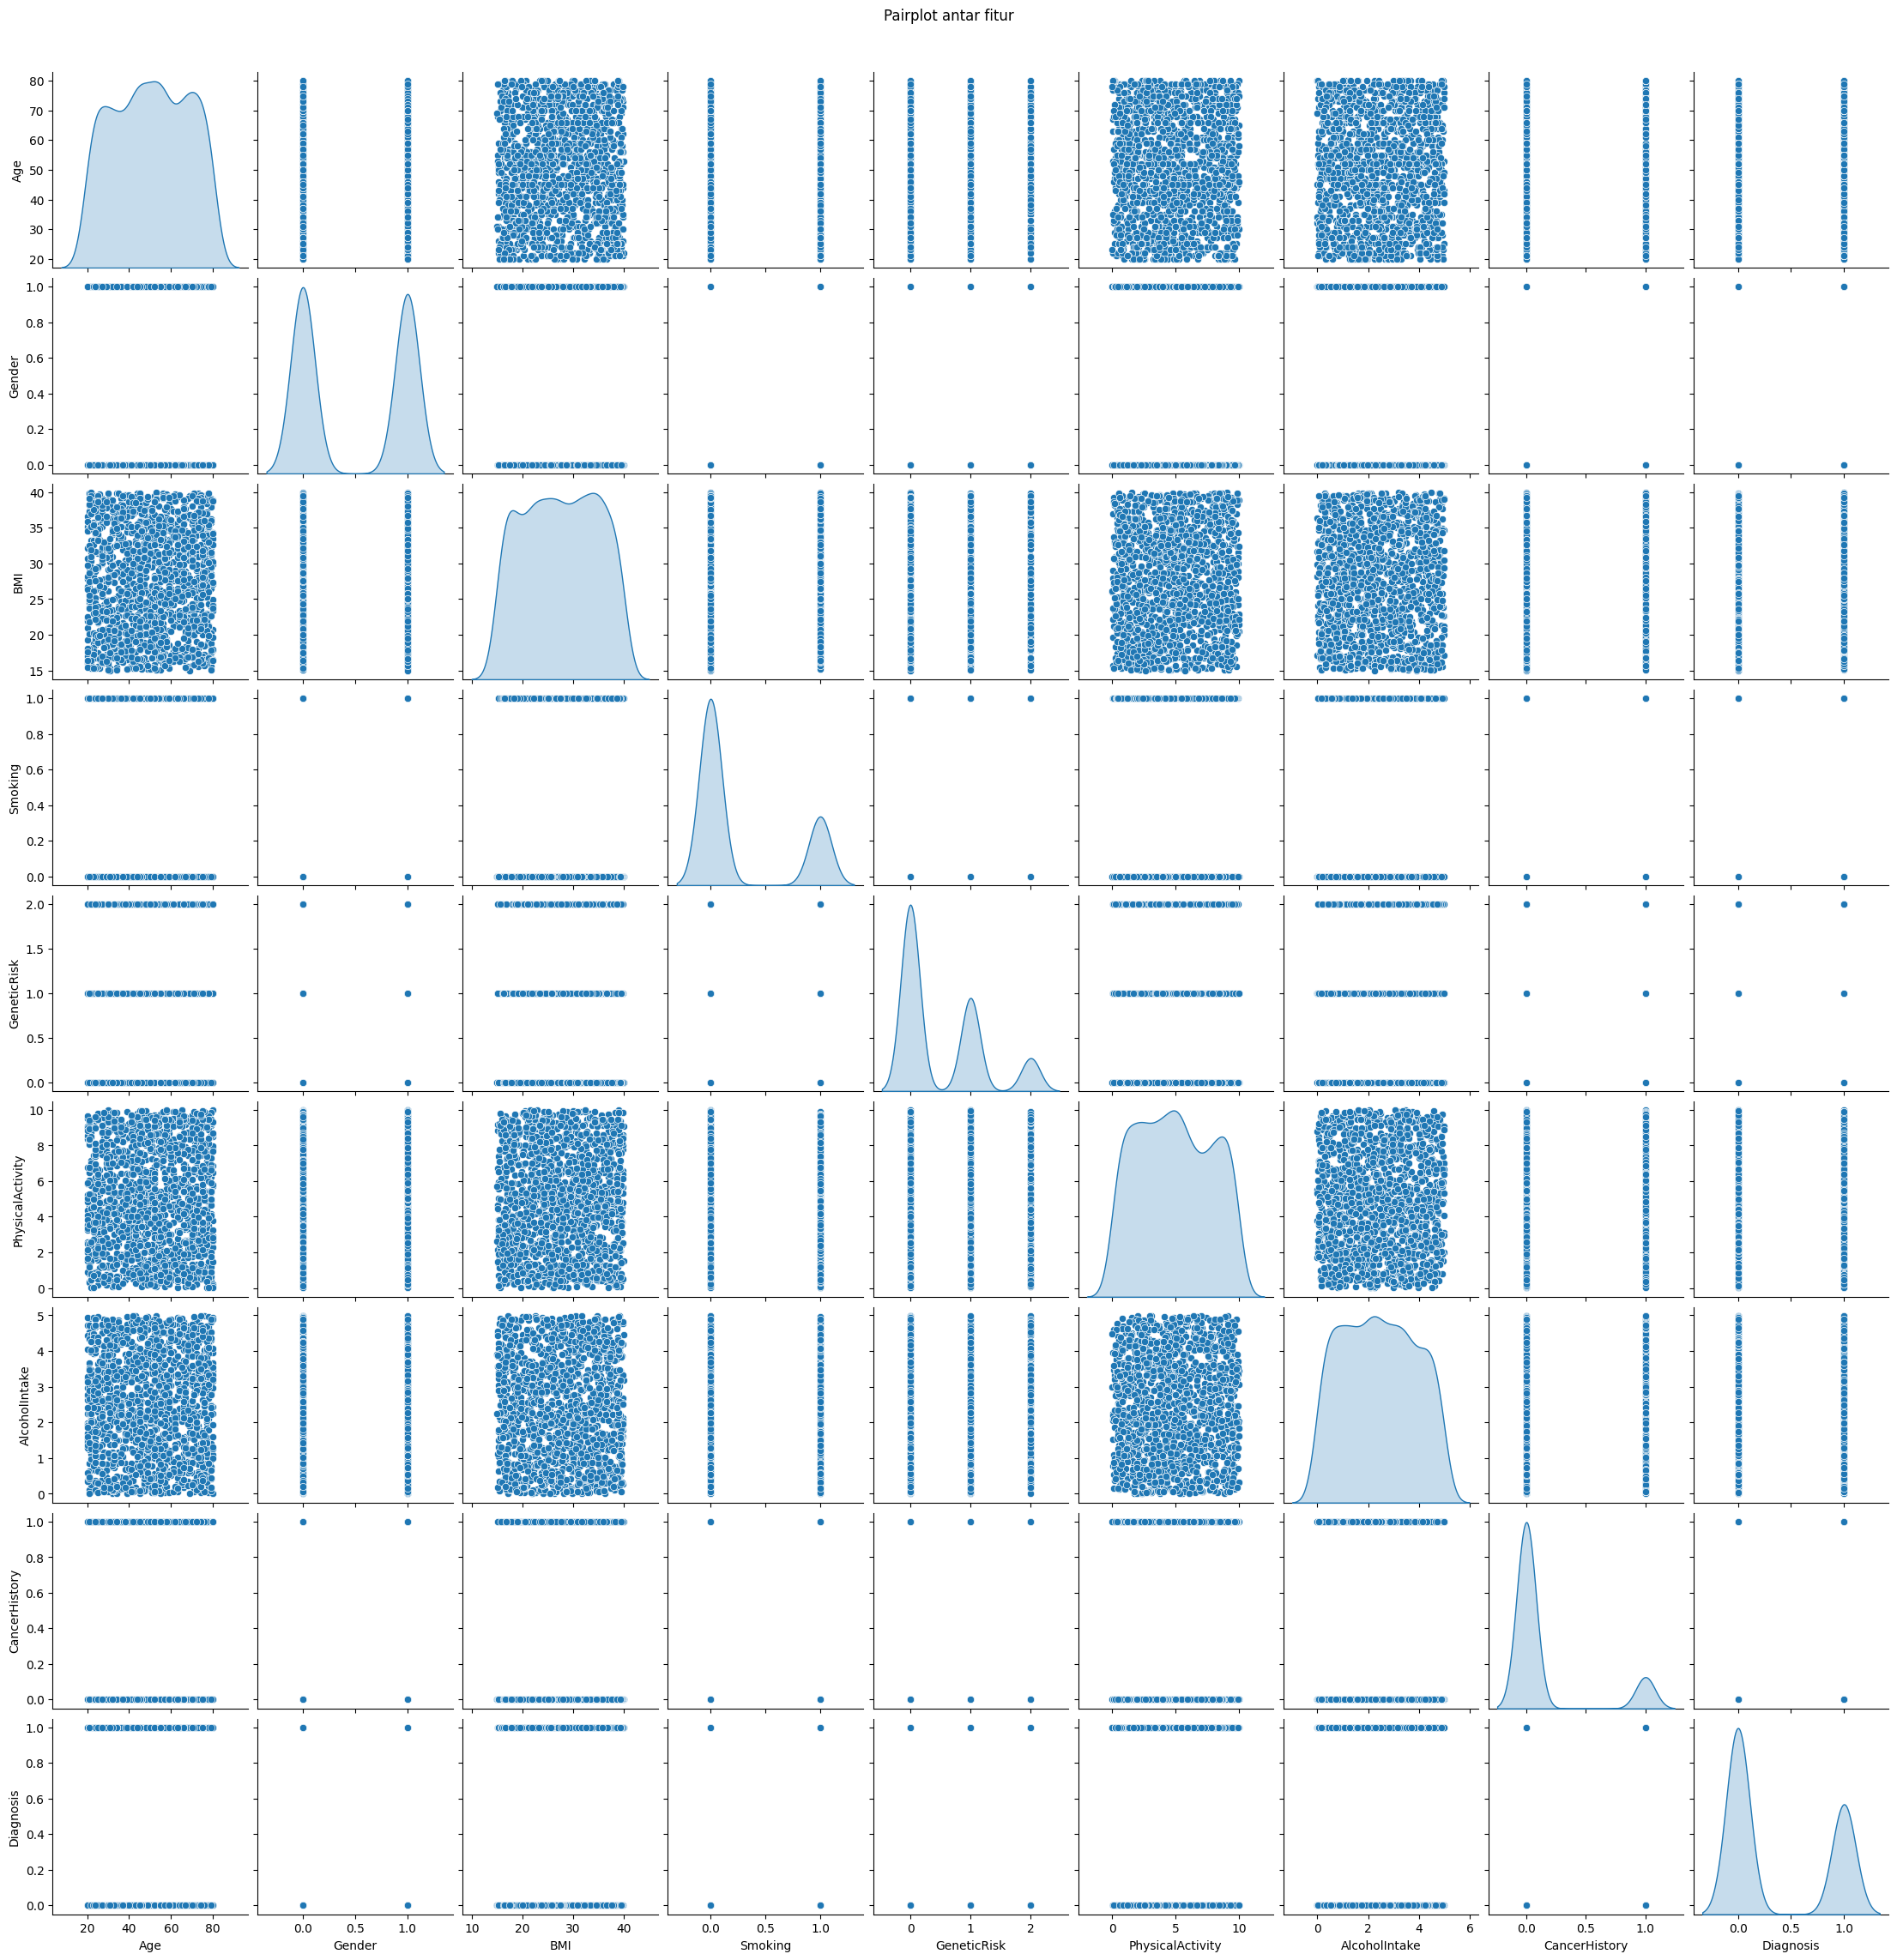

In [17]:
# Pairplot antar fitur
sns.pairplot(data, diag_kind='kde')
plt.suptitle('Pairplot antar fitur', y=1.02)
plt.show()

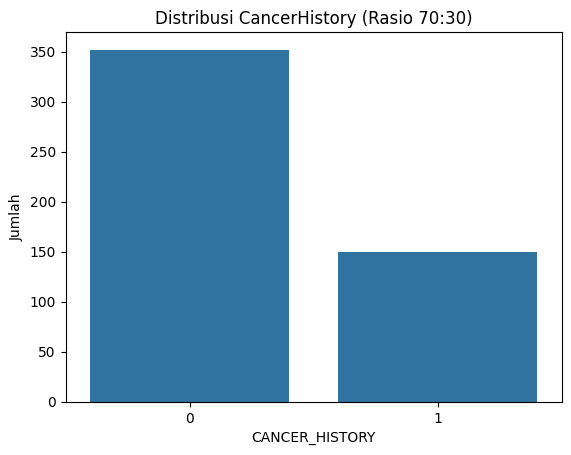


Persentase:
CancerHistory
0    70.119522
1    29.880478
Name: proportion, dtype: float64


In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Asumsikan 'data' sudah ada

# Ambil data sesuai rasio 70:30
jumlah_majority = int(0.7 * min(len(data[data['CancerHistory'] == 0]), len(data[data['CancerHistory'] == 1]) * (70/30)))
jumlah_minority = int(0.3 * jumlah_majority / 0.7)  # Sesuaikan supaya rasio tetap 70:30

majority = data[data['CancerHistory'] == 0].sample(n=jumlah_majority, random_state=42)
minority = data[data['CancerHistory'] == 1].sample(n=jumlah_minority, replace=True, random_state=42)

balanced_data = pd.concat([majority, minority])

# Plot distribusi baru
sns.countplot(x='CancerHistory', data=balanced_data)
plt.title('Distribusi CancerHistory (Rasio 70:30)')
plt.xlabel('CANCER_HISTORY')
plt.ylabel('Jumlah')
plt.show()

# Persentase baru
print("\nPersentase:")
print(balanced_data['CancerHistory'].value_counts(normalize=True) * 100)



# Data Preparation

In [19]:
# Cek missing values
print(data.isnull().sum())

# Drop atau isi missing values (contoh: isi dengan median)
data.fillna(data.median(numeric_only=True), inplace=True)

Age                 0
Gender              0
BMI                 0
Smoking             0
GeneticRisk         0
PhysicalActivity    0
AlcoholIntake       0
CancerHistory       0
Diagnosis           0
dtype: int64


In [20]:
from sklearn.preprocessing import LabelEncoder

label_enc = LabelEncoder()

# Ubah semua kolom kategorikal ke numerik
for col in data.select_dtypes(include='object').columns:
    data[col] = label_enc.fit_transform(data[col])

In [21]:
X = data.drop('CancerHistory', axis=1)  # Fitur
y = data['CancerHistory']               # Target

In [22]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [23]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

# Modeling

In [24]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Membuat model ANN
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')  # Binary classification
])

# Kompilasi model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,689 (10.50 KB)

 Trainable params: 2,689 (10.50 KB)

 Non-trainable params: 0 (0.00 B)

In [25]:
# Melatih model
history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=50,
    batch_size=32,
    verbose=1
)

Epoch 1/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - accuracy: 0.6879 - loss: 0.5962 - val_accuracy: 0.8458 - val_loss: 0.4514
Epoch 2/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8646 - loss: 0.4165 - val_accuracy: 0.8458 - val_loss: 0.4129
Epoch 3/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8602 - loss: 0.3871 - val_accuracy: 0.8458 - val_loss: 0.3897
Epoch 4/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8498 - loss: 0.3763 - val_accuracy: 0.8458 - val_loss: 0.3733
Epoch 5/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8654 - loss: 0.3469 - val_accuracy: 0.8458 - val_loss: 0.3591
Epoch 6/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8434 - loss: 0.3613 - val_accuracy: 0.8458 - val_loss: 0.3512
Epoch 7/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8567 - loss: 0.3412 - val_accuracy: 0.8458 - val_loss: 0.3426
Epoch 8/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8492 - loss: 0.3402 - val_accuracy: 0.8417 - val_loss

In [26]:
# Evaluasi model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'\nAkurasi di data test: {accuracy:.4f}')

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8776 - loss: 0.2603 

Akurasi di data test: 0.8900


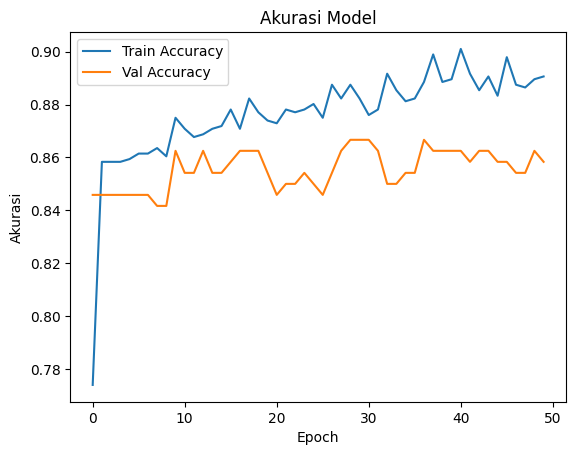

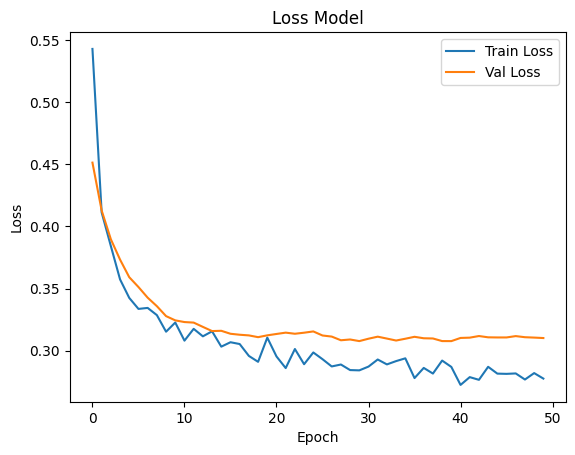

In [27]:
import matplotlib.pyplot as plt

# Akurasi
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Akurasi Model')
plt.xlabel('Epoch')
plt.ylabel('Akurasi')
plt.legend()
plt.show()

# Loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss Model')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluation

In [28]:
# Prediksi di data test
y_pred = (model.predict(X_test) > 0.5).astype("int32")

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


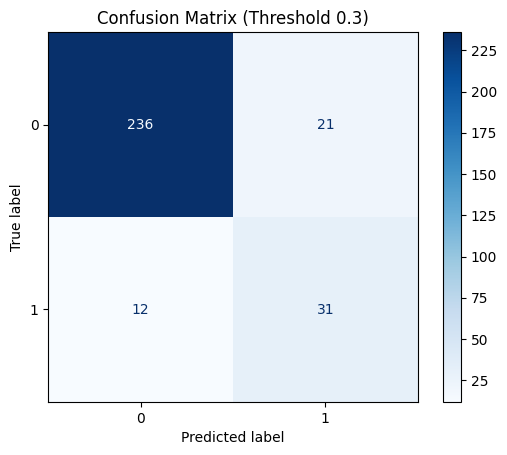

In [29]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# 1. Prediksi probabilitas
y_pred_proba = model.predict(X_test).flatten()  # <- gunakan flatten() untuk jaga bentuk

# 2. Tentukan threshold
threshold = 0.3

# 3. Buat prediksi berdasarkan threshold
y_pred_threshold = (y_pred_proba >= threshold).astype("int32")

# 4. Buat confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred_threshold)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title(f'Confusion Matrix (Threshold {threshold})')
plt.show()


In [30]:
# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.96      0.94       257
           1       0.68      0.44      0.54        43

    accuracy                           0.89       300
   macro avg       0.80      0.70      0.74       300
weighted avg       0.88      0.89      0.88       300



## Model Simulation

In [31]:
import pandas as pd
import numpy as np

# Contoh data baru untuk diprediksi
# Pastikan jumlah fitur sesuai dengan jumlah kolom di X (8 kolom)
new_data = pd.DataFrame([
    [
        50,  # Age
        2,   # Gender
        1,   # Blood_Pressure
        120, # Cancer_Type
        0,   # Radiation_Therapy
        1,   # CancerHistory_in_Family
        0,   # Smoker
        1    # Sedentary_Lifestyle
        # ... (dan seterusnya, tambahkan nilai untuk semua 8 fitur)
    ]
], columns=X.columns)  # Gunakan X.columns, bukan X_scaled.columns

# Normalisasi data numerik
new_data_scaled = scaler.transform(new_data)

# Prediksi
prediction_prob = model.predict(new_data_scaled)
prediction_class = (prediction_prob > 0.5).astype(int)  # Jika model output sigmoid binary

# Interpretasi hasil prediksi
# Misal: 0 = "tidak kanker", 1 = "kanker" (sesuaikan mapping sesuai dataset kamu)
if prediction_class[0] == 1:
    print("Pasien diprediksi TERKENA kanker.")
else:
    print("Pasien diprediksi TIDAK TERKENA kanker.")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
Pasien diprediksi TIDAK TERKENA kanker.


## Save Model

In [32]:
# Save model ke file .h5
model.save('cancer_ann_model.h5')
print("Model berhasil disimpan ke 'cancer_ann_model.h5'")

Model berhasil disimpan ke 'cancer_ann_model.h5'


In [33]:
# Convert ke TFLite
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

Saved artifact at '/tmp/tmpo3eda_ui'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 8), dtype=tf.float32, name='keras_tensor')
Output Type:
  TensorSpec(shape=(None, 1), dtype=tf.float32, name=None)
Captures:
  134672772885840: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134672772886608: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134674651509392: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134672772883152: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134672772886224: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134672772883536: TensorSpec(shape=(), dtype=tf.resource, name=None)


In [35]:
# Save hasil TFLite-nya ke file
with open('model_cancer_prediction.tflite', 'wb') as f:
    f.write(tflite_model)

print("Model berhasil disimpan ke model_cancer_prediction.tflite")

Model berhasil disimpan ke model_cancer_prediction.tflite


# Deployment

In [36]:
import joblib
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']